<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/10_feedforward_squirrels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, matthews_corrcoef

sns.set_theme(style='white')

In [2]:
# %matplotlib inline

First, download a dataset about squirrel sightings in New York City.

In [3]:
# simply using pandas
url = 'https://data.cityofnewyork.us/resource/vfnx-vebw.csv?$limit=5000'
df = pd.read_csv(url)
df.shape

(3023, 31)

In [4]:
df.head()

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [5]:
df.describe(include='all')

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
count,3023.000000,3023.000000,3023,3023,3023,3.023000e+03,3023.000000,2902,2968,1937,...,3023,3023,3023,3023,3023,3023,3023,3023,240,3023
unique,NaN,NaN,3018,339,2,NaN,NaN,3,3,10,...,2,2,2,2,2,2,2,2,197,3023
top,NaN,NaN,7D-PM-1010-01,14D,PM,NaN,NaN,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9561344937861 40.7940823884086)
freq,NaN,NaN,2,32,1676,NaN,NaN,2568,2473,767,...,2921,2973,3020,2868,2589,2845,1569,2345,9,1
mean,-73.967184,40.780853,NaN,NaN,NaN,1.011949e+07,4.123718,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.007726,0.010285,NaN,NaN,NaN,4.246671e+04,3.096492,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-73.981159,40.764911,NaN,NaN,NaN,1.006202e+07,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-73.973102,40.771676,NaN,NaN,NaN,1.008202e+07,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-73.968594,40.778166,NaN,NaN,NaN,1.012202e+07,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,-73.960189,40.791219,NaN,NaN,NaN,1.014202e+07,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory data analysis
Inspect the dataset some more, using in particular `dtypes` or `describe`.

In [6]:
print(df.dtypes)

x                             float64
y                             float64
unique_squirrel_id             object
hectare                        object
shift                          object
date                            int64
hectare_squirrel_number         int64
age                            object
primary_fur_color              object
highlight_fur_color            object
combination_of_primary_and     object
color_notes                    object
location                       object
above_ground_sighter           object
specific_location              object
running                          bool
chasing                          bool
climbing                         bool
eating                           bool
foraging                         bool
other_activities               object
kuks                             bool
quaas                            bool
moans                            bool
tail_flags                       bool
tail_twitches                    bool
approaches  

In [7]:
df.describe(include='all')

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
count,3023.000000,3023.000000,3023,3023,3023,3.023000e+03,3023.000000,2902,2968,1937,...,3023,3023,3023,3023,3023,3023,3023,3023,240,3023
unique,NaN,NaN,3018,339,2,NaN,NaN,3,3,10,...,2,2,2,2,2,2,2,2,197,3023
top,NaN,NaN,7D-PM-1010-01,14D,PM,NaN,NaN,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9561344937861 40.7940823884086)
freq,NaN,NaN,2,32,1676,NaN,NaN,2568,2473,767,...,2921,2973,3020,2868,2589,2845,1569,2345,9,1
mean,-73.967184,40.780853,NaN,NaN,NaN,1.011949e+07,4.123718,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.007726,0.010285,NaN,NaN,NaN,4.246671e+04,3.096492,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-73.981159,40.764911,NaN,NaN,NaN,1.006202e+07,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-73.973102,40.771676,NaN,NaN,NaN,1.008202e+07,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-73.968594,40.778166,NaN,NaN,NaN,1.012202e+07,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,-73.960189,40.791219,NaN,NaN,NaN,1.014202e+07,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you want, you can draw a `pairplot` – but it will be very big!

Draw sighting locations using `sns.relplot` or `sns.jointplot`, then explore the distributions of a few interesting features and the `hue` parameter.

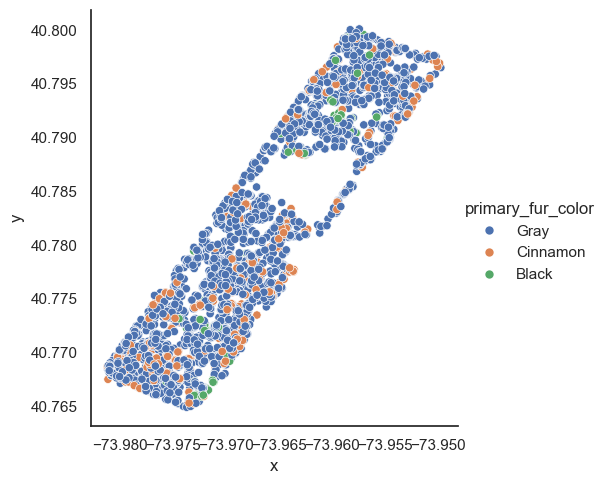

In [180]:
sns.relplot(data=df,
            x='x',
            y='y',
            hue='primary_fur_color',
            )

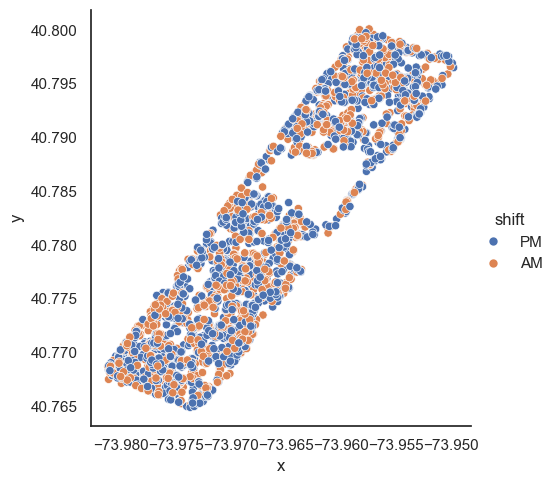

In [9]:
sns.relplot(data=df,
            x='x',
            y='y',
            hue='shift',
            )

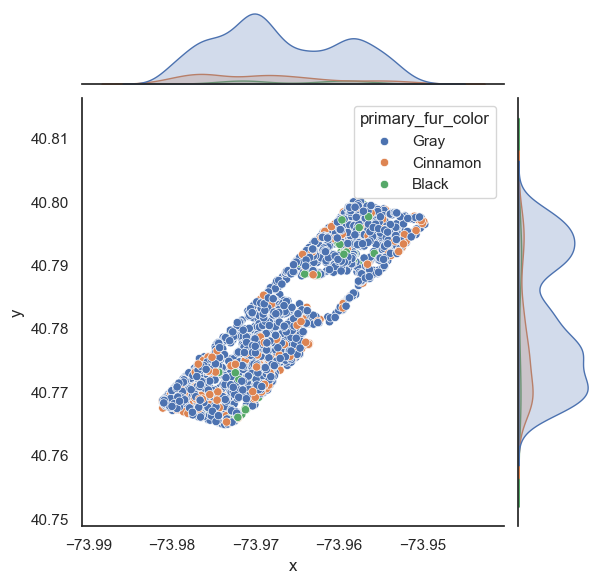

In [10]:
sns.jointplot(data=df,
              x='x',
              y='y',
              hue='primary_fur_color',
              )

## Feature Cleaning / Encoding
This dataset definitely needs some cleaning. It has a mix of categorical, boolean and numerical values; a lot of `NA`s and some string columns with rare annotation.

In [54]:
def prepare_dataset(df: pd.DataFrame,
                    target: str = 'primary_fur_color',
                    ) -> tuple[np.array, np.array, list[str], OneHotEncoder]:
    # make a copy so we don't modify the original dataframe'
    df = df.copy()

    if target not in df.columns:
        raise ValueError(f'column {target} not found in dataset!')

    # drop rows where the target column isn't defined
    df = df.dropna(subset=[target])
    print(f'{len(df)} rows remaining')

    # not all columns can be used as training features.
    # we also treat categoricals and booleans differently.
    categorical_cols = ['age', 'hectare', 'shift']
    boolean_cols = [
        'running', 'chasing', 'climbing', 'eating', 'foraging',
        'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches',
        'approaches', 'indifferent', 'runs_from',
    ]

    ok_features = [c for c in [
        'hectare', 'shift', 'primary_fur_color',
        'highlight_fur_color', 'specific_location',
        'running', 'chasing', 'climbing', 'eating',
        'foraging', 'kuks', 'quaas', 'moans',
        'tail_flags', 'tail_twitches', 'approaches',
        'indifferent', 'runs_from',
    ] if c in df.columns]

    # Keep only available columns
    cat_cols = [c for c in categorical_cols if c in df.columns and c != target]
    bool_cols = [c for c in boolean_cols if c in df.columns and c != target]

    # fill booleans with False, then convert to int
    df[bool_cols] = df[bool_cols].fillna(False).astype(int)

    # encode the categorical features
    enc_cat = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_cat = enc_cat.fit_transform(df[cat_cols]) if cat_cols else np.empty((len(df), 0))
    cat_feature_names = enc_cat.get_feature_names_out(cat_cols).tolist() if cat_cols else []

    # combine
    X = np.concatenate([df[bool_cols].values, X_cat], axis=1)
    feature_names = bool_cols + cat_feature_names

    # encode the target column
    y_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    y = y_encoder.fit_transform(df[[target]])

    return X, y, feature_names, y_encoder
    

In [168]:
X, y, feature_names, y_encoder = prepare_dataset(df, target='primary_fur_color')  # 'primary_fur_color' 'shift', 'age'

2968 rows remaining


In [169]:
# finally make a train-test-split
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, test_size=.3, random_state=42, stratify=y,)
X_val, X_test, y_val, y_test = train_test_split(
    X_eval, y_eval, test_size=.5, random_state=42, stratify=y_eval,)

print(f'train: {X_train.shape}\nval:   {X_val.shape}\ntest:  {X_test.shape}')
print('Classes:', y_encoder.categories_[0])

train: (2077, 357)
val:   (445, 357)
test:  (446, 357)
Classes: ['Black' 'Cinnamon' 'Gray']


### Reproducibility

In [170]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(1)
set_seed(2)
sns.set_theme(style='white')

## Predict Squirrel Fur Color

In [184]:
def make_multiclass_model(input_shape, n_classes):
    inputs = keras.Input(shape=input_shape)
    dense1 = keras.layers.Dense(16, activation='relu')(inputs)
    dense1 = keras.layers.Dropout(.5)(dense1)
    dense2 = keras.layers.Dense(32, activation='relu')(dense1)
    outputs = keras.layers.Dense(n_classes, activation='softmax')(dense2)
    return keras.Model(inputs=inputs, outputs=outputs)

model = make_multiclass_model((X_train.shape[1],), y_train.shape[1])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 357)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │         5,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,371 (24.89 KB)

 Trainable params: 6,371 (24.89 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    verbose=2)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

Epoch 1/100
130/130 - 1s - 4ms/step - accuracy: 0.8031 - loss: 0.7351 - val_accuracy: 0.8337 - val_loss: 0.5492
Epoch 2/100
130/130 - 0s - 517us/step - accuracy: 0.8334 - loss: 0.5485 - val_accuracy: 0.8337 - val_loss: 0.5365
Epoch 3/100
130/130 - 0s - 507us/step - accuracy: 0.8334 - loss: 0.5415 - val_accuracy: 0.8337 - val_loss: 0.5309
Epoch 4/100
130/130 - 0s - 554us/step - accuracy: 0.8334 - loss: 0.5224 - val_accuracy: 0.8337 - val_loss: 0.5237
Epoch 5/100
130/130 - 0s - 565us/step - accuracy: 0.8334 - loss: 0.5064 - val_accuracy: 0.8337 - val_loss: 0.5150
Epoch 6/100
130/130 - 0s - 514us/step - accuracy: 0.8334 - loss: 0.4895 - val_accuracy: 0.8337 - val_loss: 0.5069
Epoch 7/100
130/130 - 0s - 514us/step - accuracy: 0.8334 - loss: 0.4781 - val_accuracy: 0.8337 - val_loss: 0.4994
Epoch 8/100
130/130 - 0s - 497us/step - accuracy: 0.8334 - loss: 0.4647 - val_accuracy: 0.8337 - val_loss: 0.4945
Epoch 9/100
130/130 - 0s - 502us/step - accuracy: 0.8339 - loss: 0.4511 - val_accuracy: 0.

In [186]:
history_df = pd.DataFrame.from_dict(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.803081,0.735123,0.833708,0.549212
1,0.833414,0.548487,0.833708,0.536531
2,0.833414,0.541513,0.833708,0.530884
3,0.833414,0.522440,0.833708,0.523746
4,0.833414,0.506395,0.833708,0.514953


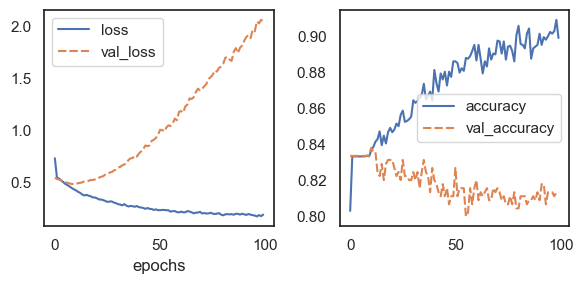

In [187]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3))

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax0)
ax0.set_xlabel('epochs')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax1)
plt.tight_layout()


In [175]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
f'test loss: {test_loss:.2f}, test accuracy {test_accuracy:.2f}'

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.7803 - loss: 1.7801


'test loss: 1.78, test accuracy 0.78'

In [176]:
y_pred = model.predict(X_test)
prediction = y_encoder.inverse_transform(y_pred)
ground_truth = y_encoder.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


In [177]:
cm = confusion_matrix(ground_truth, prediction)
print(cm)

[[  0   1  15]
 [  2  17  40]
 [  8  32 331]]


In [178]:
# To confirm which axis is the truth and which is the prediction
np.unique(ground_truth, return_counts=True)

(array(['Black', 'Cinnamon', 'Gray'], dtype=object), array([ 16,  59, 371]))

[Text(0.5, 20.049999999999997, 'prediction'),
 Text(74.45000000000006, 0.5, 'ground truth')]

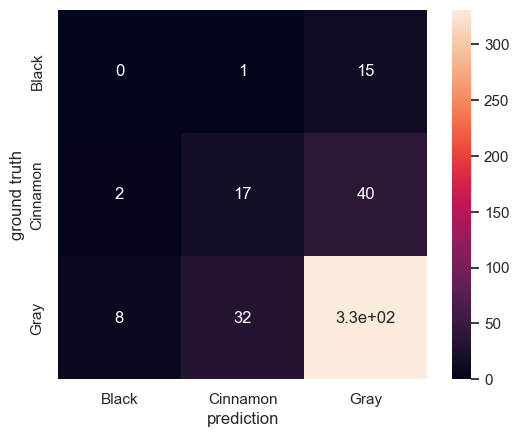

In [179]:
ax = sns.heatmap(cm, annot=True, square=True,
            yticklabels=y_encoder.categories_[0],
            xticklabels=y_encoder.categories_[0],
            )
ax.set(xlabel='prediction', ylabel='ground truth')

## Extra Task: Predict `shift`
This means whether the squirrel was seen before or after noon.

## Extra Task: Feature Engineering
Build a feature that indicates whether a squirrel will accept and eat a nut from you:
It `approaches` or `forages`, or `eating` already. Also, it is not `indifferent` or `runs_from` you. Then build a predictor for this feature!

## Extra Task: Regression
Build a synthetic feature that encodes how chatty a squirrel is. For that, combine `kuks`, `moans` and `quaas`.